# Word2Vec

#### Word2Vec bir kelime vektoru olusturma yontemidir.
#### Bu yontem, verilen metindeki kelimelere benzer anlamdaki kelimeleri ayni vektor boyutlarina sahip olarak ozetler.
#### Bu vektorler kelimelerin anlamini veya ozelliklerini ifade etmek icin kullanilabilir.
## 2 Farkli yontem kullanilabilir;
### 1. CBOW(Continuous Bag of Words): Metindeki kelimelerin etrafindaki kelimelere dayanarak kelime vektorlerini ogrenir.
### 2. Skip-Gram: Verilen bir kelime icin, bu kelime ile birlikte kullanilan diger kelimeleri tahmin etmeyi amaclar.

In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE # Vektorleri Gorsellestirecegimiz kutuphane
import matplotlib.pyplot as plt

C:\python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.7) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
f = open(file='hurriyet.txt', mode='r', encoding='utf-8')
text = f.read()

### Veri setimizde noktalama isaretleri ve her harf kucuk oldugundan nltk ile tokenization yapmak yerine split() ile tokenize yapmamiz yeterli olacaktir.

In [3]:
t_list = text.split('\n')
t_list[:10:1]

['iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi ',
 'gösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı ',
 'dini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar ',
 'musevi ye ölüm ve idam idam sloganları duyuldu ',
 'muhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü ',
 'den fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı ',
 'öte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı ',
 'hamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere 

In [4]:
corpus = [stem.split() for stem in t_list]
corpus[:10]

[['iran',
  'devlet',
  'televizyonu',
  'ülkedeki',
  'eyaletin',
  'sinde',
  'yapılan',
  'reformcuları',
  'protesto',
  'amaçlı',
  'yürüyüşlere',
  'milyonlarca',
  'kişinin',
  'katıldığını',
  'bildirdi'],
 ['gösterilerde',
  'fitnecilere',
  'ölüm',
  'münafıklara',
  'ölüm',
  'abd',
  'ye',
  'ölüm',
  'ingiltere',
  'ye',
  'ölüm',
  'sloganları',
  'atıldı'],
 ['dini',
  'lider',
  'ali',
  'hamaney',
  've',
  'cumhurbaşkanı',
  'mahmud',
  'ahmedinejad',
  'ı',
  'destekleyen',
  'iranlılar',
  'son',
  'olaylarda',
  'yeğeni',
  'öldürülen',
  'mir',
  'hüseyin',
  'musevi',
  'başta',
  'olmak',
  'üzere',
  'muhalefet',
  'liderlerini',
  'kınadılar'],
 ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'],
 ['muhalefet',
  'liderleri',
  'kaçtı',
  'mı',
  'aşure',
  'günü',
  'yaşanan',
  'çatışmalarda',
  'devlet',
  'kaynaklarına',
  'göre',
  'u',
  'terörist',
  'olmak',
  'üzere',
  'kişi',
  'ölmüştü'],
 ['den',
  'fazla',
  'kişinin',
  'yar

In [5]:
# corpus=egitimin yapilacagi corpus, vector_size=kelime vektorlerinin uzunlugu,
# window=sagdaki ve soldaki bakilacak kelime sayisi(window size), min_count=corpusda minimum gecen kelime sayisi,
# sg=skip-gram kullanilacagini belirtiyoruz(default=cbow).
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=5, sg=1)

In [6]:
model.wv['ankara'] #wv=wordvector kisaltilmisi / ankaranin kelime vektorune bakalim

array([-0.3300288 , -0.29605797, -0.27336833,  0.04690244,  0.6325581 ,
        0.06747679,  0.06062918,  0.70658076, -0.24196814, -0.39346132,
        0.05708873, -0.46471047, -0.00098408,  0.49130744,  0.09960853,
        0.18406852,  0.47481543, -0.23511864, -0.19233431, -0.44159862,
       -0.01133917,  0.5759385 ,  0.5514946 , -0.5932391 , -0.22022064,
        0.11101308, -0.3971539 ,  0.13123919, -0.63671005,  0.42280102,
       -0.13875362,  0.12705047, -0.29681554, -0.01672035, -0.18150906,
       -0.14364332, -0.35075456, -0.18218896,  0.10656198, -0.6407243 ,
        0.48261356,  0.33953765,  0.25154445,  0.14746363,  0.61423177,
        0.09610147, -0.3260003 , -0.07339932,  0.22738516, -0.18034555,
        0.01844579,  0.03207954, -0.00938255,  0.07548686,  0.01474749,
       -0.047359  , -0.1974686 ,  0.09337499, -0.19860747, -0.45077175,
        0.21630074,  0.14809212, -0.22258495,  0.22938868, -0.13602225,
       -0.10212576,  0.10269693,  0.4222452 , -0.56502604, -0.41

### Birbirlerine yakin kelimelerin vektorlerinide birbirlerine yakin olmasini bekleriz. Bunu test edelim;

#### Hollanda kelimesine yakin kelimelere bakalim. Eger hata alirsak yazdigimiz kelime, kelime haznesinde bulunmamaktadir! 

In [7]:
model.wv.most_similar('hollanda')

[('danimarka', 0.8211957812309265),
 ('avusturya', 0.8146202564239502),
 ('belçika', 0.7859250903129578),
 ('kanada', 0.7666620016098022),
 ('almanya', 0.763215959072113),
 ('ispanya', 0.7456960678100586),
 ('avustralya', 0.7399278879165649),
 ('fransa', 0.7210065126419067),
 ('finlandiya', 0.7202153205871582),
 ('lüksemburg', 0.693677544593811)]

## Modelimizi daha sonra kullanmak icin kaydedelim.

In [18]:
model.save('word2vec.model')

## Modelimizi kullanmak icin yukleyelim.

In [3]:
model = Word2Vec.load('word2vec.model')

In [7]:
model.wv.most_similar('abd')

[('amerikan', 0.7636352777481079),
 ('stavridis', 0.6700119376182556),
 ('kerry', 0.6461517810821533),
 ('brennan', 0.6408788561820984),
 ('dunford', 0.6401093602180481),
 ('wp', 0.6363139748573303),
 ('washington', 0.6361366510391235),
 ('blinken', 0.6338413953781128),
 ('obama', 0.631594181060791),
 ('votel', 0.6302452683448792)]

## TSNE ile bir kelimeye yakin olan diger kelimeleri gorelim;

In [24]:
def closetwords_tsneplot(model, word): # model ve kelime girdi alicak
    word_vectors = np.empty((0, 100)) # bos numpy array/vector_size 100 old. 100 verdik/func. aldigi kelimenin vektorune yakin olan kelimeleri atayalim
    word_labels = [word] # kelimelerin saklanacagi list
    
    close_words = model.wv.most_similar(word) # func'a gelen kelimelere yakin olan kelimeleri alalim
    
    #TSNE ile gostermek istedigimiz kelimenin vektorune ulasmamiz gerekli.
    word_vectors = np.append(arr=word_vectors, values=np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(arr=word_vectors, values=np.array([model.wv[word]]), axis=0)
    
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors) # kordinatlar
    
    x_coords = Y[:, 0] # x kordinati
    y_coords = Y[:, 1] # y kordinati
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(4, -2), textcoords='offset points') # grafik uzerine yazi yazdirma
    
    plt.show()

C:\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


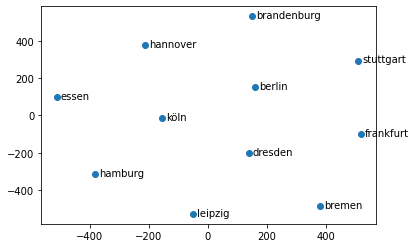

In [25]:
closetwords_tsneplot(model, 'berlin')